# Generate videos with AI

Create videos from text prompts or animate images using Google's Veo model.

## Problem

You need to generate video content programmatically—for social media, product demos, or creative applications.

| Use case | Input | Output |
|----------|-------|--------|
| Social content | Text prompt | Short video clips |
| Product demos | Product image | Animated product video |
| Creative apps | User prompts | Generated video content |
| Marketing | Static images | Animated banners |

## Solution

**What's in this recipe:**

- Generate videos from text prompts
- Animate existing images into videos
- Store prompts and generated videos together

Use Google's Veo model to generate videos. Videos are cached—regeneration only happens if the prompt changes.

### Setup

In [ ]:
%pip install -qU pixeltable google-genai

In [2]:
import os
import getpass

if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = getpass.getpass(
        'Google AI Studio API Key: '
    )

In [3]:
import pixeltable as pxt
from pixeltable.functions import gemini

In [4]:
# Create a fresh directory
pxt.drop_dir('video_gen_demo', force=True)
pxt.create_dir('video_gen_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/pjlb/.pixeltable/pgdata
Created directory 'video_gen_demo'.


### Generate videos from text prompts

In [5]:
# Create a table for text-to-video generation
videos = pxt.create_table(
    'video_gen_demo.text_to_video', {'prompt': pxt.String}
)

# Add computed column that generates videos
videos.add_computed_column(
    video=gemini.generate_videos(
        videos.prompt, model='veo-2.0-generate-001'
    )
)

Created table 'text_to_video'.
Added 0 column values with 0 errors.


No rows affected.

Inserting rows into `text_to_video`: 1 rows [00:00, 190.68 rows/s]
Inserted 1 row with 0 errors.


prompt,video
A serene mountain lake at sunrise with mist rising from the water,

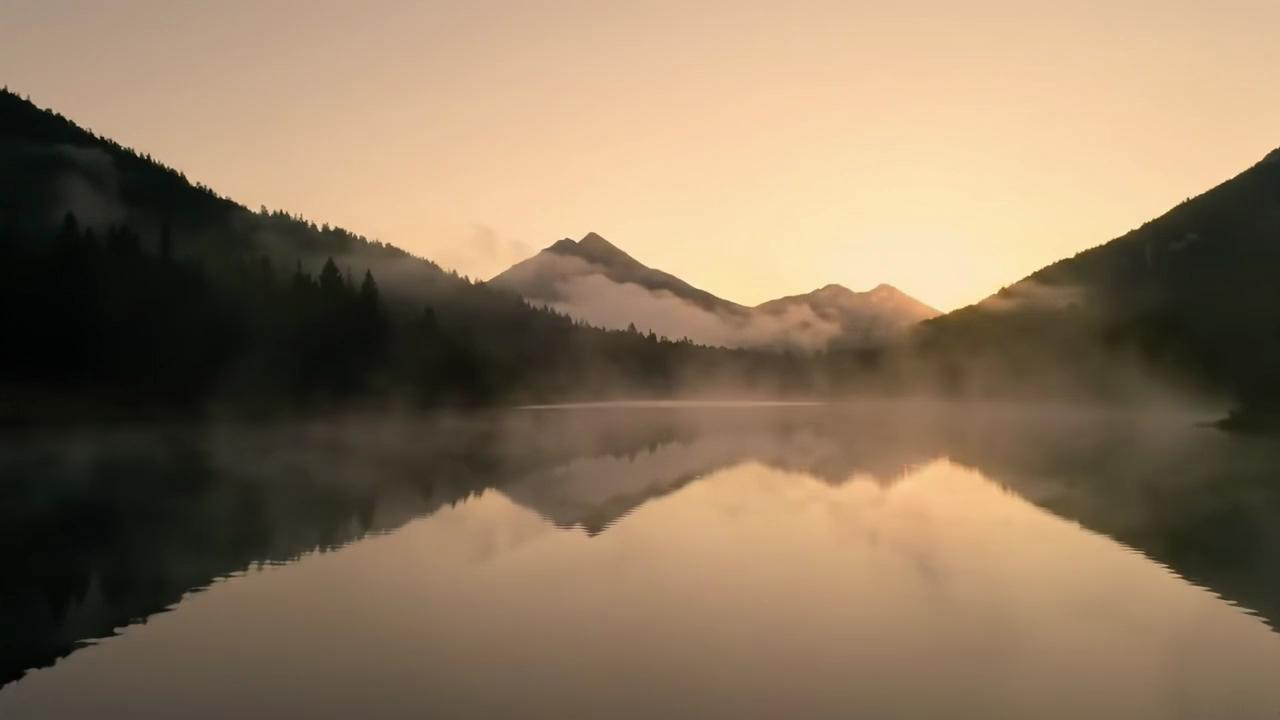

In [6]:
# Generate a video from a text prompt
videos.insert(
    [
        {
            'prompt': 'A serene mountain lake at sunrise with mist rising from the water'
        }
    ]
)

# View the result
videos.select(videos.prompt, videos.video).collect()

### Animate images into videos

In [7]:
# Create a table for image-to-video generation
animated = pxt.create_table(
    'video_gen_demo.image_to_video',
    {'image': pxt.Image, 'description': pxt.String},
)

# Add computed column that animates images
animated.add_computed_column(
    video=gemini.generate_videos(
        image=animated.image, model='veo-2.0-generate-001'
    )
)

Created table 'image_to_video'.
Added 0 column values with 0 errors.


No rows affected.

Inserting rows into `image_to_video`: 1 rows [00:00, 291.88 rows/s]
Inserted 1 row with 0 errors.


image,video
,

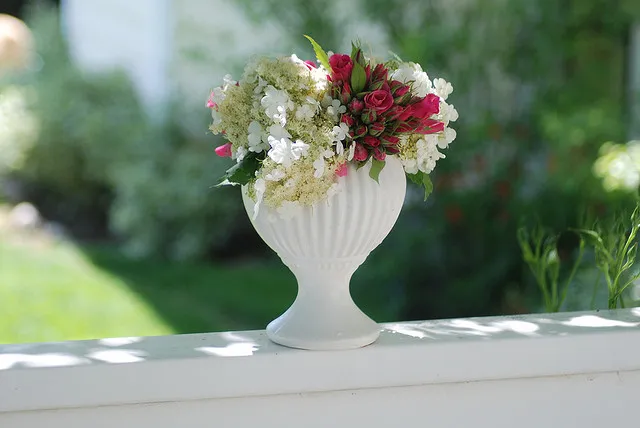
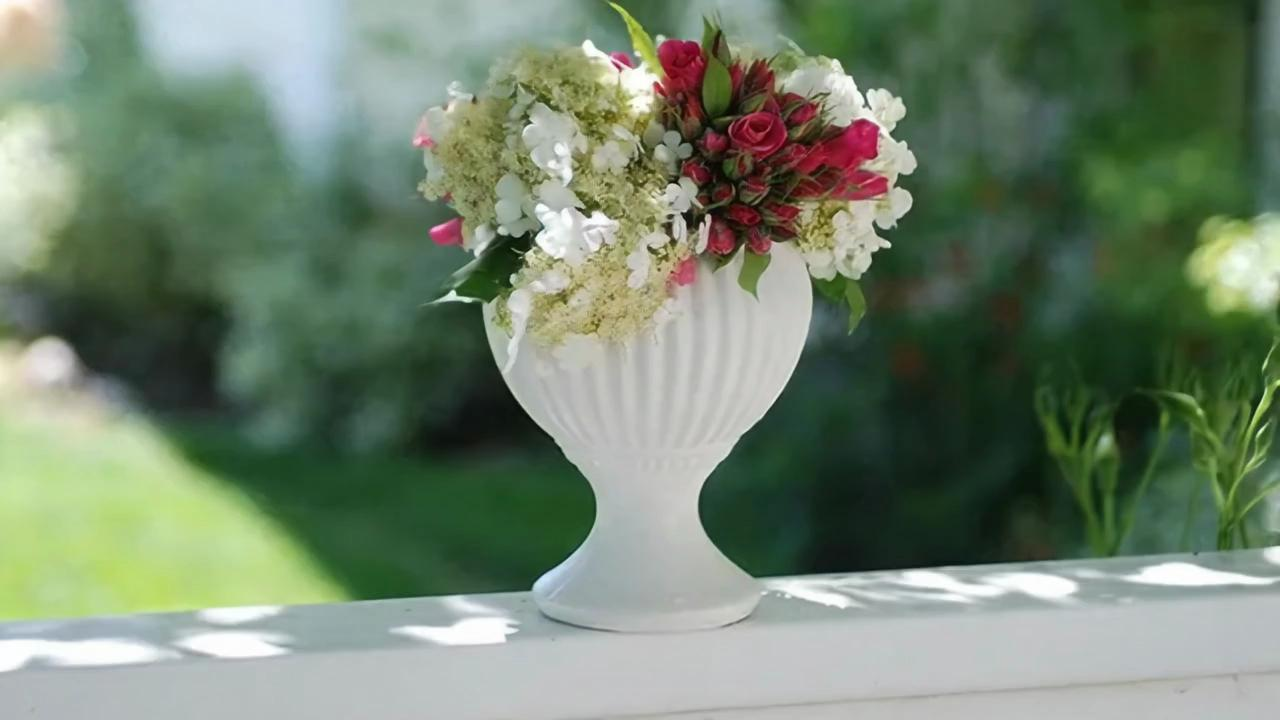

In [8]:
# Animate an image
base_url = 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images'

animated.insert(
    [
        {
            'image': f'{base_url}/000000000030.jpg',
            'description': 'Beach scene',
        }
    ]
)

# View the animated result
animated.select(animated.image, animated.video).collect()

## Explanation

**Generation modes:**

| Mode | Input | Use case |
|------|-------|----------|
| Text-to-video | Text prompt | Create videos from descriptions |
| Image-to-video | Image | Animate static images |

**Veo model options:**

| Model | Description |
|-------|-------------|
| `veo-2.0-generate-001` | Latest Veo model for high-quality video |

**Tips:**

- Prompts work best when descriptive and specific
- Generated videos are cached - same prompt returns cached result
- Image-to-video preserves the composition of the input image
- New rows automatically generate videos on insert

**Requirements:**

- Google AI Studio API key (set `GEMINI_API_KEY`)
- `pip install google-genai`

## See also

- [Extract frames from videos](https://docs.pixeltable.com/howto/cookbooks/video/video-extract-frames) - Pull frames from generated videos
- [Add text overlays](https://docs.pixeltable.com/howto/cookbooks/video/video-add-text-overlay) - Add captions to videos